In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly

In [4]:
curr_dir=os.getcwd()
f_path = os.path.join(curr_dir, "data", "cancer patient data sets.csv")
df=pd.read_csv(f_path)
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [5]:
df=df.drop("index", axis=1)
features = df.drop(["Patient Id","Level"], axis=1)
labels = df["Level"]

In [6]:
df.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [7]:
df_low_others = df.copy()
df_low_others["Level"] = df['Level'].replace(["Medium","High"],"medium_high")
#df_low_others["Level"] = df_low_others['Level'].replace("High","medium_high")
pd.unique(df_low_others['Level'])


array(['Low', 'medium_high'], dtype=object)

In [8]:
f_pca=['Age',
 'Alcohol use',
 'Smoking',
 'chronic Lung Disease',
 'Fatigue',
 'Coughing of Blood',
 'Chest Pain',
 'Genetic Risk',
 'OccuPational Hazards',
 'Shortness of Breath',
 'Weight Loss',
 'Clubbing of Finger Nails',
 'Dry Cough',
 'Wheezing']

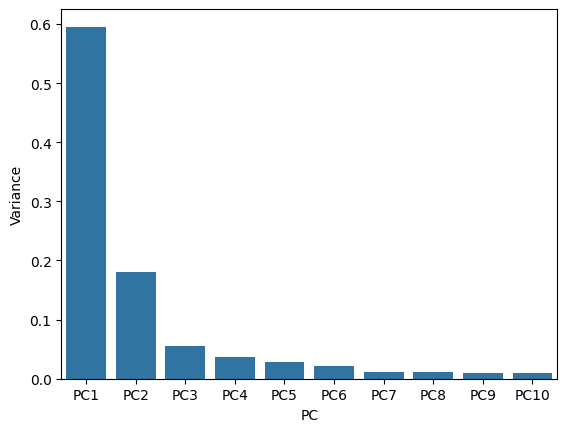

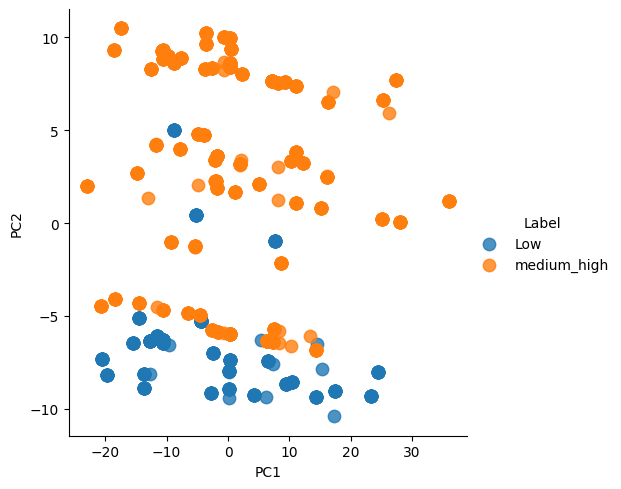

In [9]:
x=df_low_others.drop(["Patient Id","Level"], axis=1)
#x=x[f_pca]
y=df_low_others["Level"]
n_comp=10
pc_list = [f"PC{i+1}" for i in range(n_comp)]

from sklearn import decomposition
pca = decomposition.PCA(n_components=n_comp)
pc = pca.fit_transform(x)
pc_df = pd.DataFrame(data=pc,columns=pc_list)
pc_df['Label'] = y
# variance explained by PCs
# PC1 + PC2 explains 78% variance 
var = pd.DataFrame({'Variance':pca.explained_variance_ratio_,
             'PC':pc_list})

sns.barplot(x='PC',y="Variance", 
           data=var)
sns.lmplot( x="PC1", y="PC2",
  data=pc_df, 
  fit_reg=False, 
  hue='Label', # color by cluster
  legend=True,
  scatter_kws={"s": 80}) # specify the point size

In [10]:
import plotly.express as plotly_express
figure = plotly_express.scatter_3d(pc_df,x="PC1",y="PC2",z="PC3",color="Label",)
figure.update_layout(showlegend=True)
figure.show()

#### Random trying stuff

In [11]:
f_select_k = ['Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards',
                    'Genetic Risk', 'Balanced Diet', 'Obesity', 'Passive Smoker',
                    'Chest Pain', 'Coughing of Blood']
f_pca = ['Age','Alcohol use','Smoking','chronic Lung Disease','Fatigue',
            'Coughing of Blood','Chest Pain','Genetic Risk','OccuPational Hazards']

In [12]:
f_pca=['Age',
 'Alcohol use',
 'Smoking',
 'chronic Lung Disease',
 'Fatigue',
 'Coughing of Blood',
 'Chest Pain',
 'Genetic Risk',
 'OccuPational Hazards',
 'Shortness of Breath',
 'Weight Loss',
 'Clubbing of Finger Nails',
 'Dry Cough',
 'Wheezing']

In [13]:
#features selected using Method 3
f_pca=['Coughing of Blood',
 'Wheezing',
 'Obesity',
 'Snoring',
 'Air Pollution',
 'Clubbing of Finger Nails',
 'Swallowing Difficulty'
 ]

In [14]:
selected_features = df[f_pca]
selected_features.shape

(1000, 7)

In [15]:
from sklearn.model_selection import train_test_split
X = selected_features
# Can replace this with our features when we have
y = df["Level"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn import svm
from sklearn.metrics import accuracy_score
# linear_clf = svm.SVC(probability=True)
linear_clf = svm.SVC(kernel="linear", decision_function_shape='ovo', probability=True)
linear_clf.fit(X_train, y_train)
y_pred = linear_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  1.0


In [17]:
#Cross validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(linear_clf, X, y, cv=5)
print("Mean CV accuracy:", cv_scores.mean())

Mean CV accuracy: 1.0


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


scaler = StandardScaler()
X = features
# X= scaler.fit_transform(X)

X[['Age']] = scaler.fit_transform(X[['Age']])
# X_test_scaled = scaler.transform(X_test)
# Can replace this with our features when we have
y = df["Level"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


logistic_clf = LogisticRegression(random_state=42)
logistic_clf.fit(X_train, y_train)
# Predicting on the test set
y_pred = logistic_clf.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


Accuracy:  1.0


/Users/eugenegan/Documents/GitHub_repo/Lung_Cancer_Prediction/ML_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [19]:
logistic_clf.intercept_
logistic_clf.coef_


array([[ 0.03222952, -0.81865495,  0.67283488,  1.60368156, -1.74853247,
         0.01662802, -0.89941949, -0.08611429,  0.55423475,  0.63626964,
        -0.73620481,  1.08408464, -0.0882244 ,  0.38130901,  1.18304406,
        -0.31894261,  0.2713501 , -0.2075846 ,  0.58951791,  0.39670681,
        -0.13313232, -0.17770604, -0.52248432],
       [-0.52375145,  0.70326591,  0.25986528, -0.95372101,  0.13218887,
         0.83385861, -0.96923091, -0.23894952, -0.04431159, -0.62032928,
         0.88567548, -1.07405492,  0.61612728, -0.33400055, -1.31180733,
         0.6949259 , -0.22564829, -0.13123874, -0.72327769, -0.82278523,
        -0.10051642, -0.0106106 , -0.02959204],
       [ 0.49152192,  0.11538904, -0.93270016, -0.64996055,  1.61634359,
        -0.85048662,  1.8686504 ,  0.32506381, -0.50992317, -0.01594036,
        -0.14947067, -0.01002971, -0.52790288, -0.04730846,  0.12876327,
        -0.37598329, -0.04570181,  0.33882334,  0.13375978,  0.42607842,
         0.23364874,  0.1883